# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**

In [10]:
# Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas:
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo:
mask = np.logical_and(dataset.estacion =='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

# Quitamos las columnas que no vamos a utilizar:
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora:
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2:
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
# Corregimos el nombre de fecha2 a fecha:

dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
# Reordenamos el dataset por fecha:

dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


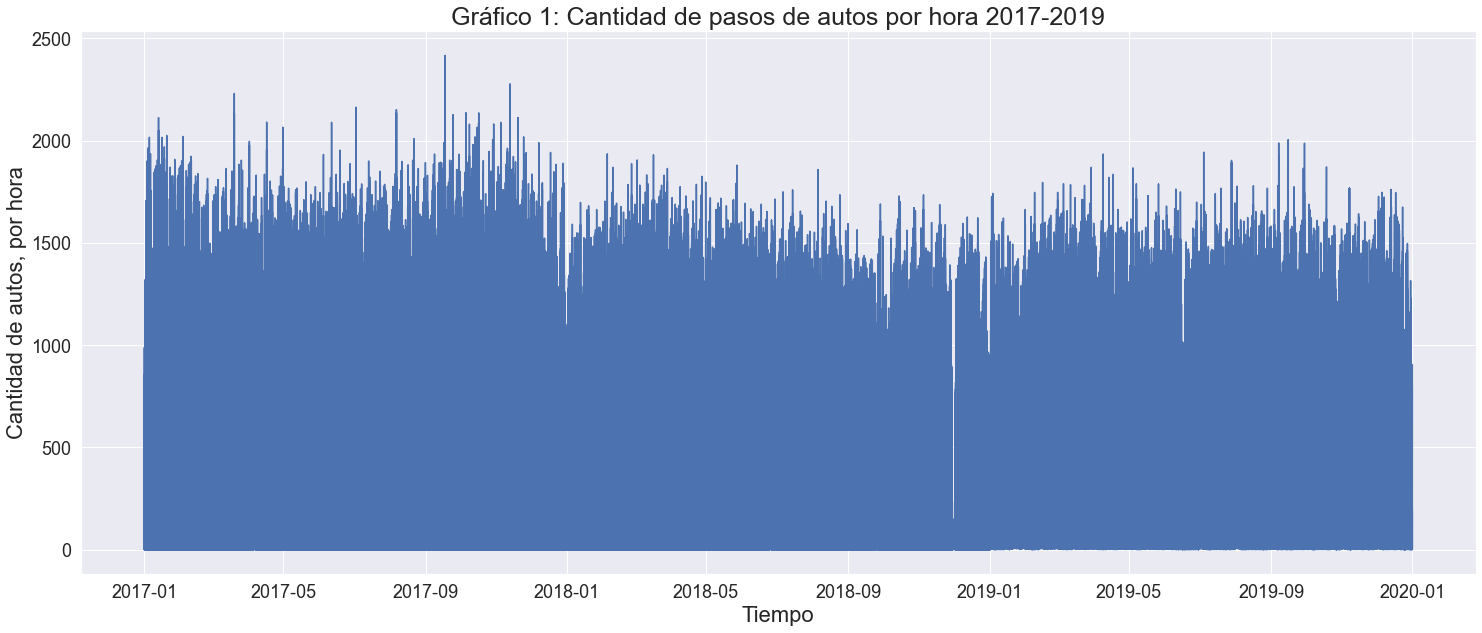

In [14]:
# Graficamos nuestros datos, tal como están:

sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos, por hora', fontsize = 22)
plt.title("Gráfico 1: Cantidad de pasos de autos por hora 2017-2019", fontsize = 25)
plt.show()

In [15]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


In [16]:
# Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable:

diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


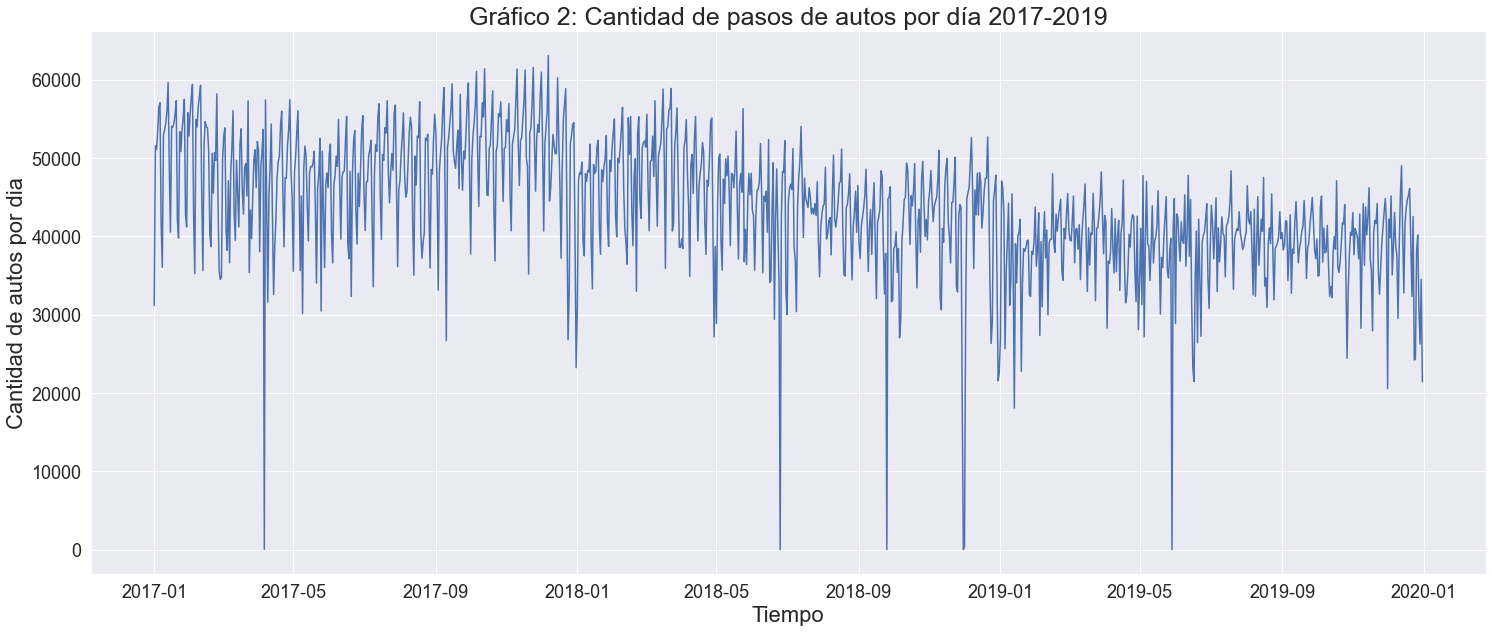

In [17]:
sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(diario.index, diario.cantidad_pasos)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos por dia', fontsize = 22)
plt.title("Gráfico 2: Cantidad de pasos de autos por día 2017-2019", fontsize = 25)
plt.show()

In [18]:
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [19]:
diario.columns

Index(['cantidad_pasos'], dtype='object')

#### Análisis exploratorio y preprocesamiento de los datos

In [20]:
# Generamos un nuevo Data Set para poder hacer la diferenciación de datos (fechas) y los gráficos de Groupby, ya que si no la
# fecha será el índice y no podremos hacerlo. Necesitamos que esta sea una columna.

In [21]:
diario_1 = diario.copy()
diario_1.reset_index(inplace = True)
diario_1.columns

Index(['fecha', 'cantidad_pasos'], dtype='object')

In [22]:
diario_1['resampleo_check'] = diario_1.fecha.diff()
diario_1.resampleo_check.value_counts()

1 days    1094
Name: resampleo_check, dtype: int64

In [23]:
diario_1.head()

,fecha,cantidad_pasos,resampleo_check
0,2017-01-01,31183,NaT
1,2017-01-02,51568,1 days
2,2017-01-03,51093,1 days
3,2017-01-04,53332,1 days
4,2017-01-05,56486,1 days


In [24]:
trafico_dias = diario_1.groupby(diario_1.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending = True)
trafico_dias

,cantidad_pasos
fecha,
Sunday,5791961
Saturday,6441715
Monday,6691387
Tuesday,6865551
Wednesday,7125526
Thursday,7302169
Friday,7647272


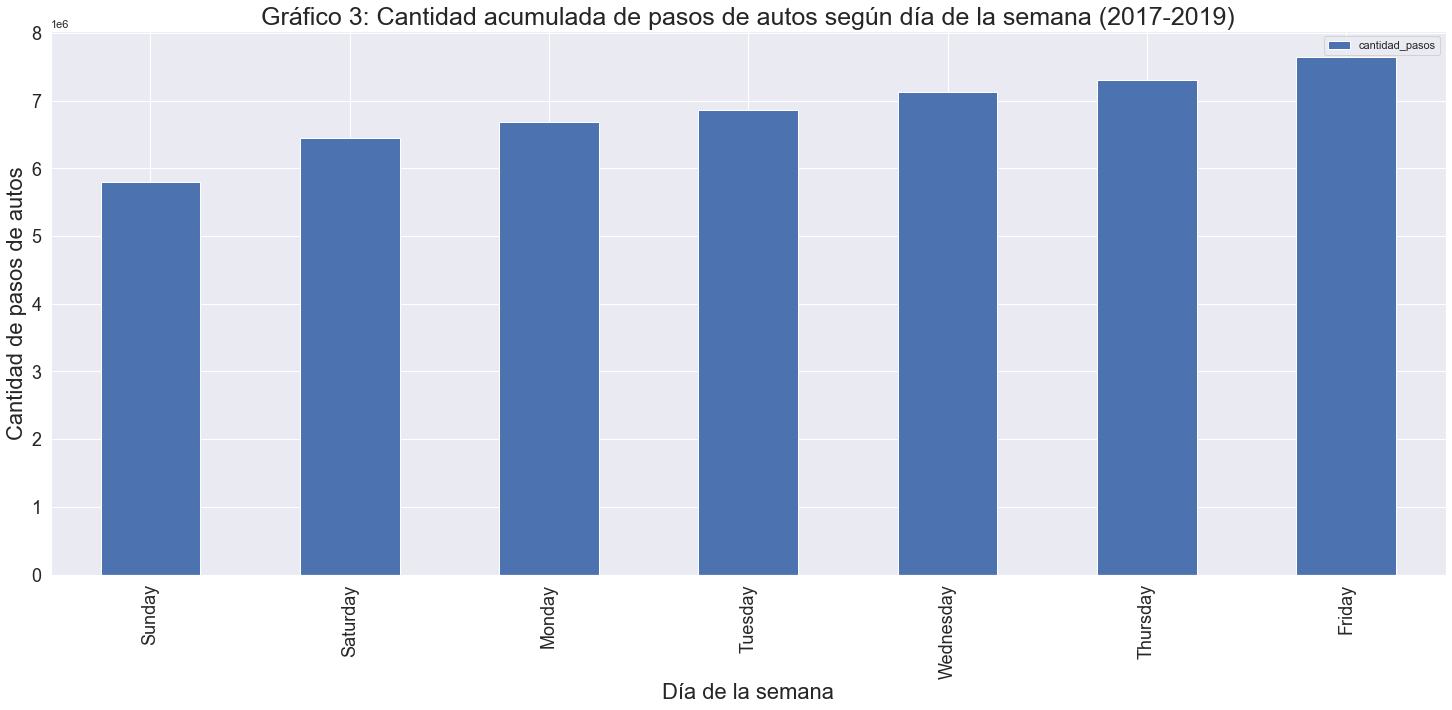

In [25]:
sns.set(rc = {'figure.figsize':(25, 10)})
trafico_dias.plot.bar()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Día de la semana', fontsize = 22)
plt.ylabel('Cantidad de pasos de autos', fontsize = 22)
plt.title("Gráfico 3: Cantidad acumulada de pasos de autos según día de la semana (2017-2019)", fontsize = 25)
plt.show()

In [26]:
# Los días de mayor tráfico son los Viernes. En cambio, los días con menos autos pasando por los peajes son los Domingos.

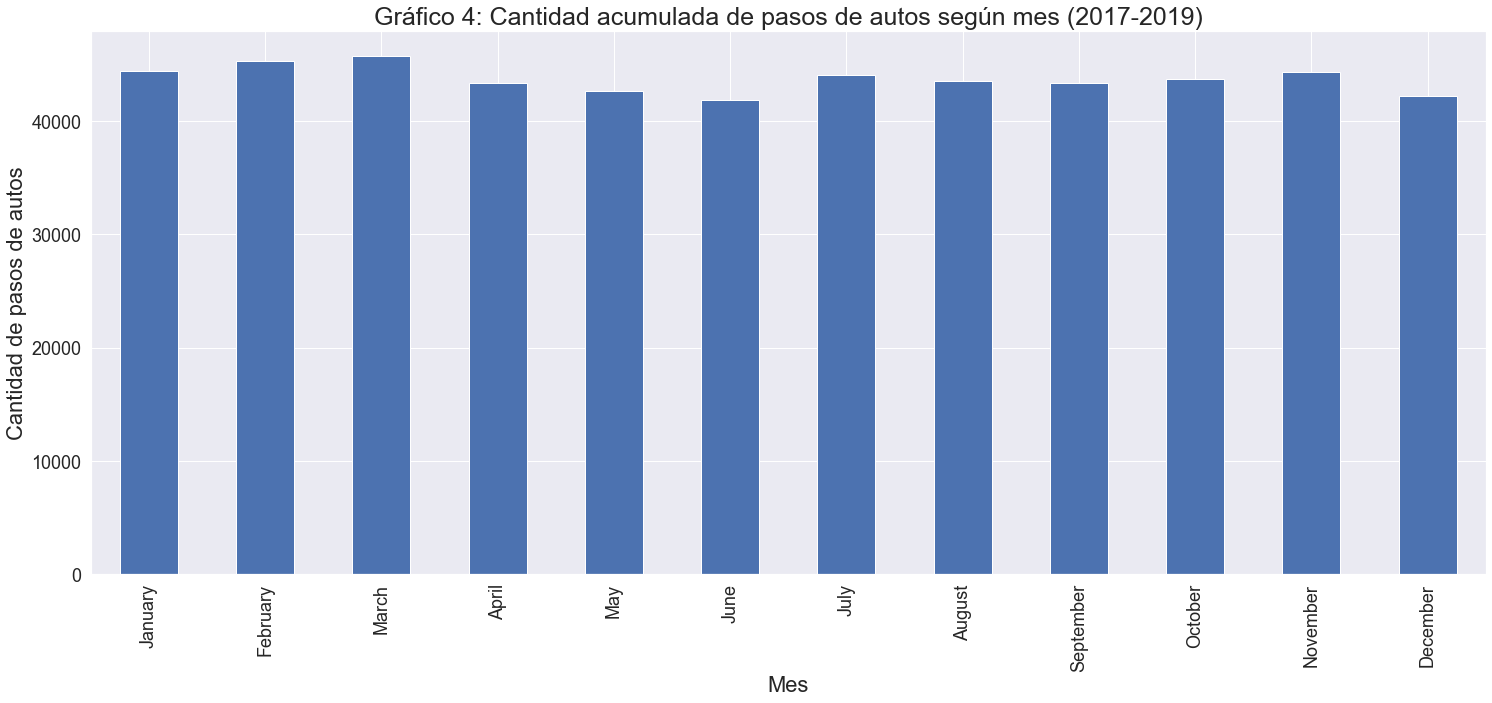

In [27]:
sns.set(rc = {'figure.figsize':(25, 10)})
diario_1.groupby(diario_1.fecha.dt.month_name(), sort = False)['cantidad_pasos'].mean().plot.bar()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Mes', fontsize = 22)
plt.ylabel('Cantidad de pasos de autos', fontsize = 22)
plt.title("Gráfico 4: Cantidad acumulada de pasos de autos según mes (2017-2019)", fontsize = 25)
plt.show()

In [28]:
# Si bien el tráfico es bastante similar a lo largo del año, puede decirse que los meses con mayor cantidad de pasos por el
# peaje son Marzo y Febrero. En cambio, aquellos con menor cantidad son Junio y Diciembre.

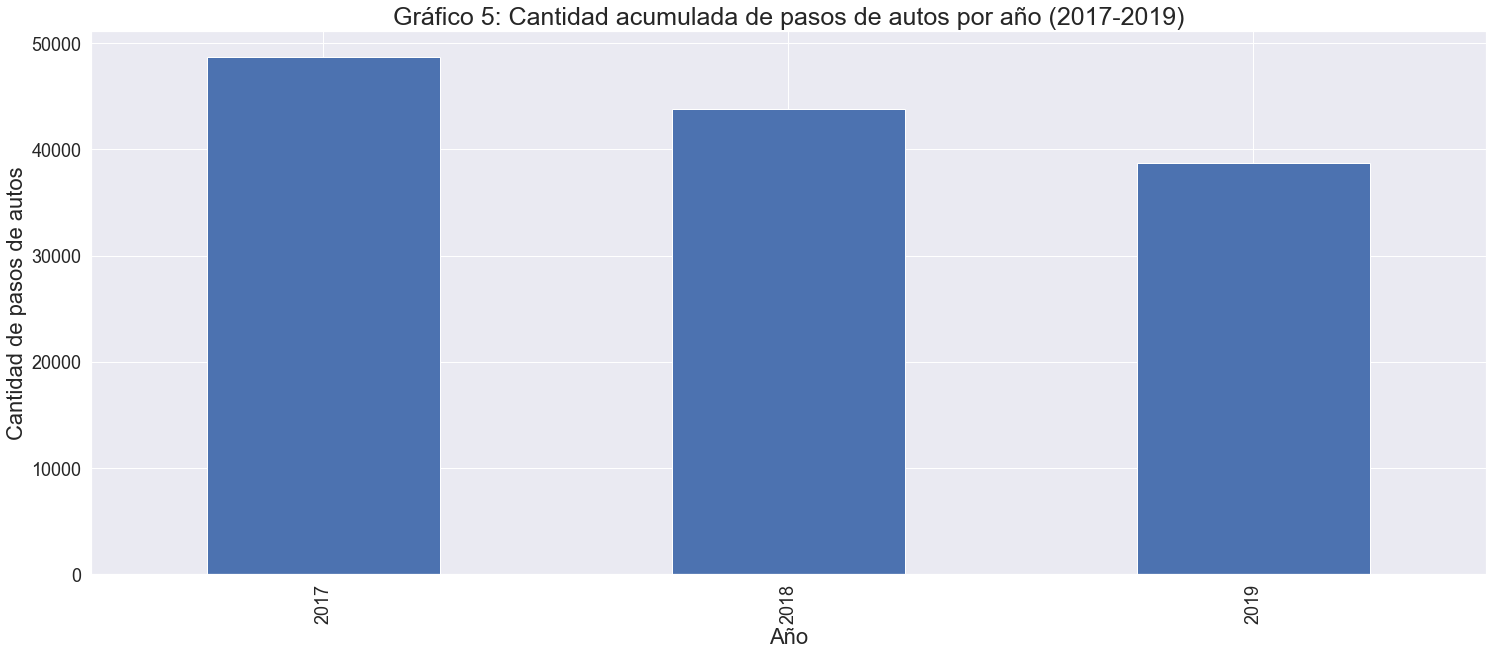

In [29]:
sns.set(rc = {'figure.figsize':(25, 10)})
diario_1.groupby(diario_1.fecha.dt.year)['cantidad_pasos'].mean().plot.bar()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Año', fontsize = 22)
plt.ylabel('Cantidad de pasos de autos', fontsize = 22)
plt.title("Gráfico 5: Cantidad acumulada de pasos de autos por año (2017-2019)", fontsize = 25)
plt.show()

In [30]:
# Con el correr de los años, si bien podemos suponer que el tráfico se incrementó, la cantidad de personas pasando por el peaje
# y pagando en efectivo disminuyó notablemente. Esto podría deberse a la migración a otras formas de pago (Telepase, por ejemplo).

##### Outliers y distribución de los datos

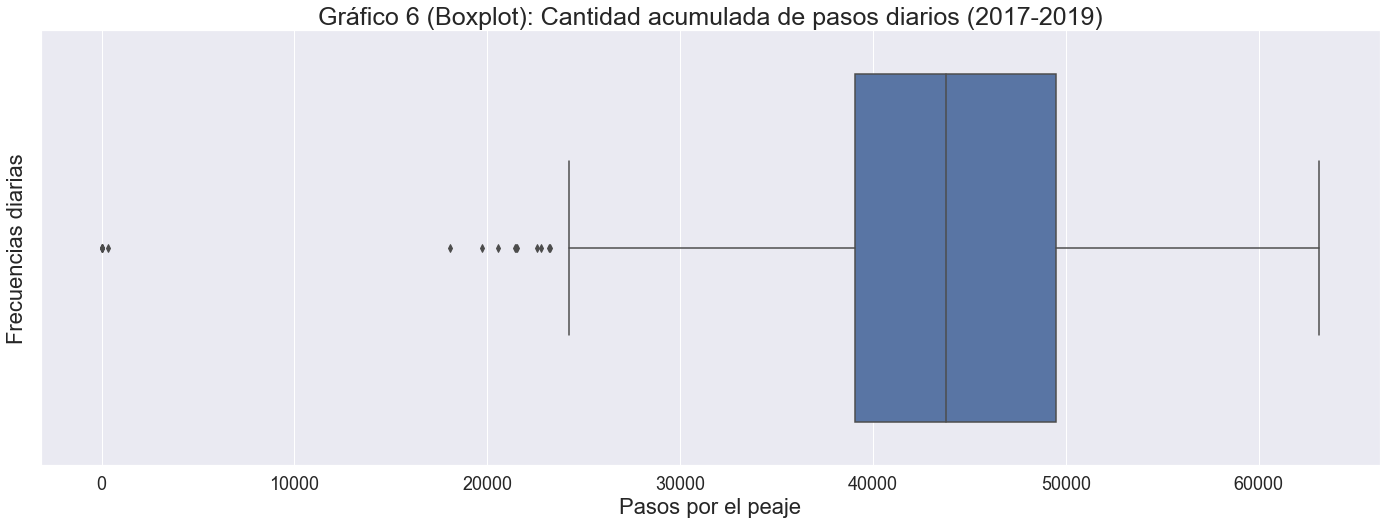

In [31]:
plt.figure(figsize = (24,8))
sns.boxplot(x = 'cantidad_pasos', data = diario)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 6 (Boxplot): Cantidad acumulada de pasos diarios (2017-2019)', fontsize = 25);
plt.xlabel('Pasos por el peaje', fontsize = 22);
plt.ylabel('Frecuencias diarias', fontsize = 22);

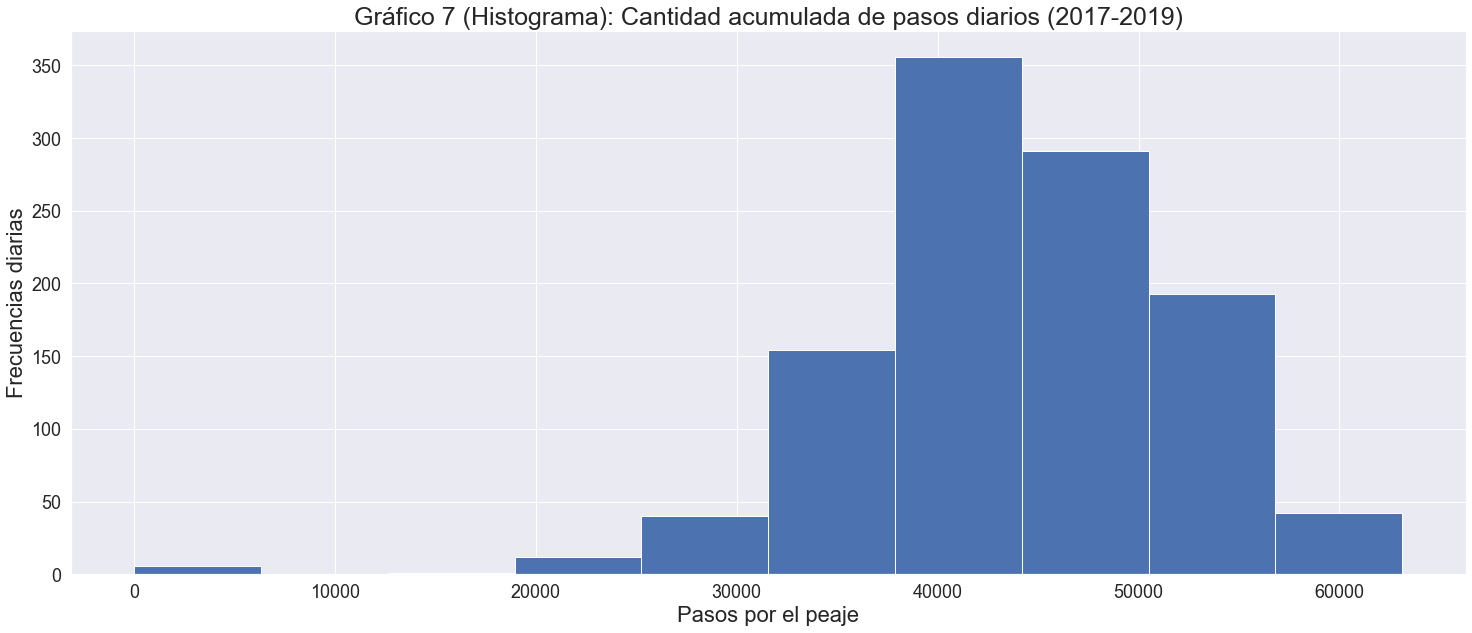

In [32]:
plt.hist(diario.cantidad_pasos)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 7 (Histograma): Cantidad acumulada de pasos diarios (2017-2019)', fontsize = 25);
plt.xlabel('Pasos por el peaje', fontsize = 22);
plt.ylabel('Frecuencias diarias', fontsize = 22);

In [33]:
# Como puede apreciarse, la distribución de los datos es relativamente simétrica y normal y existen valores atípicos, sobre
# todo con cantidad de pasos muy bajos por los peajes.

##### Filtrado de valores atípicos

In [34]:
# Al ser la distribución de la cantidad de pasos normal o gaussiana, existe la posibilidad de utilizar la regla de las tres
# sigmas para filtrar outliers. Primero se generarán nulos en reemplazo des estos datos y luego se utilizará interpolate para
# llenar los mismos.

In [35]:
media_cantidad_pasos = np.mean(diario.cantidad_pasos)
std_cantidad_pasos = np.std(diario.cantidad_pasos)
minimo_cantidad_pasos = media_cantidad_pasos - 3*std_cantidad_pasos
maximo_cantidad_pasos = media_cantidad_pasos + 3*std_cantidad_pasos
print("Cantidad de Pasos Diarios")
print("Media:", media_cantidad_pasos)
print("Desvío Estándar:", std_cantidad_pasos)
print("Cantidad de Pasos MÍNIMA:", minimo_cantidad_pasos)
print("Cantidad de Pasos MÁXIMA:", maximo_cantidad_pasos)

Cantidad de Pasos Diarios
Media: 43712.859360730596
Desvío Estándar: 8188.995096625065
Cantidad de Pasos MÍNIMA: 19145.8740708554
Cantidad de Pasos MÁXIMA: 68279.8446506058


In [36]:
diario.cantidad_pasos[diario.cantidad_pasos > maximo_cantidad_pasos] = np.nan
diario.cantidad_pasos[diario.cantidad_pasos < minimo_cantidad_pasos] = np.nan

In [37]:
diario.isna().sum()

cantidad_pasos    7
dtype: int64

In [38]:
diario = diario.interpolate()
diario.isna().sum()

cantidad_pasos    0
dtype: int64

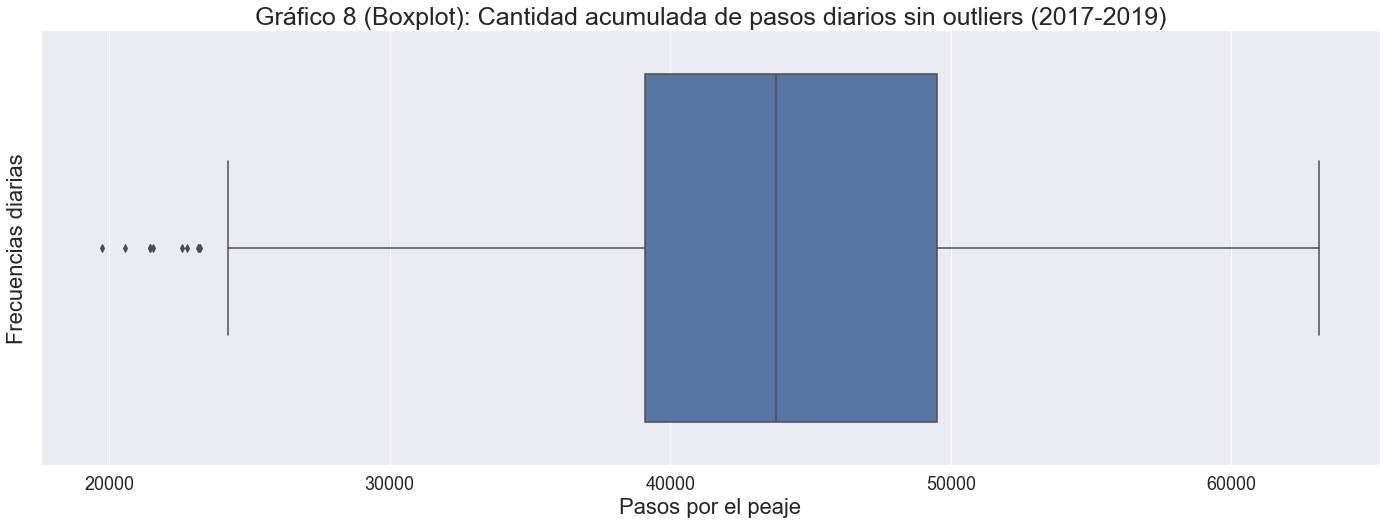

In [39]:
plt.figure(figsize = (24,8))
sns.boxplot(x = 'cantidad_pasos', data = diario)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 8 (Boxplot): Cantidad acumulada de pasos diarios sin outliers (2017-2019)', fontsize = 25);
plt.xlabel('Pasos por el peaje', fontsize = 22);
plt.ylabel('Frecuencias diarias', fontsize = 22);

##### Componentes estacionales y tendencia de la serie

###### Gráfico 9: Descomposición de la Serie de Tiempo

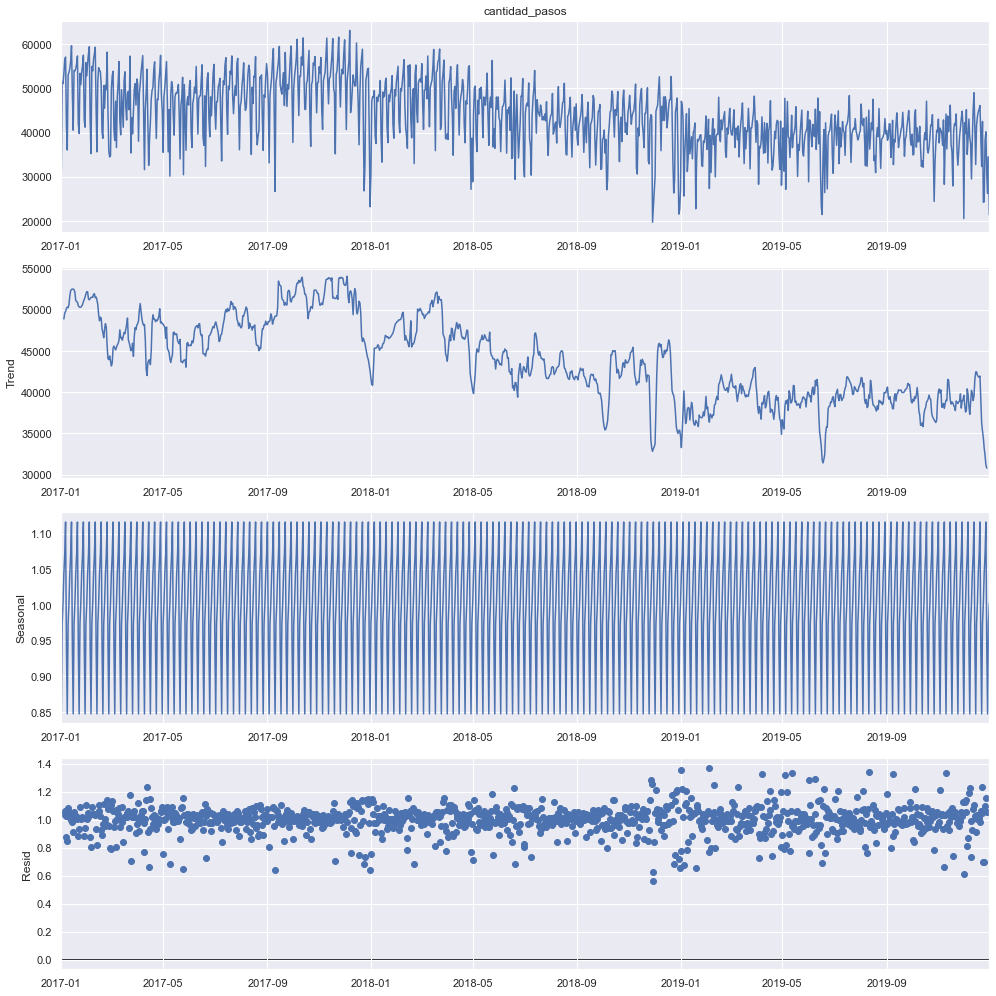

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

result = seasonal_decompose(diario.cantidad_pasos, model = 'multiplicative')

matplotlib.rcParams['figure.figsize'] = [14, 14]
result.plot()
plt.show()

In [41]:
# Como se puede apreciar, la tendencia (Trend) de la serie de tiempo es decreciente (debido a la migración a formas de pago
# digitales). Asimismo, se puede ver que existen ciclos semanales constantes ya que la descomposición en lo que respecta este
# punto (Seasonal) muestra líneas con poco espacio de diferencia y con constancia. Por último, a simple vista podría inferirse que
# los residuos (Resid) son azarosos y por ruido blanco, ya que casi todos los puntos están a una misma altura, distribuidos de
# modo bastante uniforme. No obstante ello, para considerarse que los residuos son completamente azarosos, la media debería ser
# 0, lo cual no parece cumplirse. Es posible que esto se deba a que la serie no sea estacionaria y tenga una tendencia declinante
# considerable.

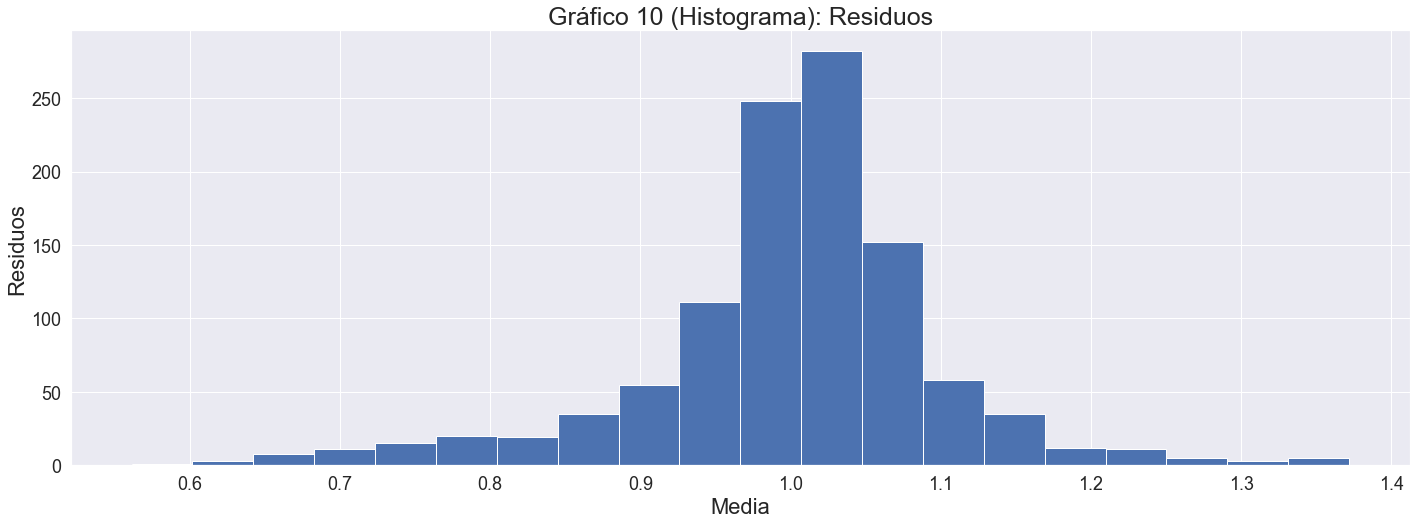

In [42]:
plt.figure(figsize = (24,8))
plt.hist(result.resid, bins = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 10 (Histograma): Residuos', fontsize = 25);
plt.xlabel('Media', fontsize = 22);
plt.ylabel('Residuos', fontsize = 22);
plt.show()

In [43]:
# Como puede apreciarse, el histograma es bastante simétrico, de modo que podríamos deducir que los residuos de la serie con
# la que se está trabajando son mayormente consecuencia de ruido blanco.

##### Tendencia Lineal (Regresión Lineal)

In [44]:
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183.0,736330
2017-01-02,51568.0,736331
2017-01-03,51093.0,736332
2017-01-04,53332.0,736333
2017-01-05,56486.0,736334


In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

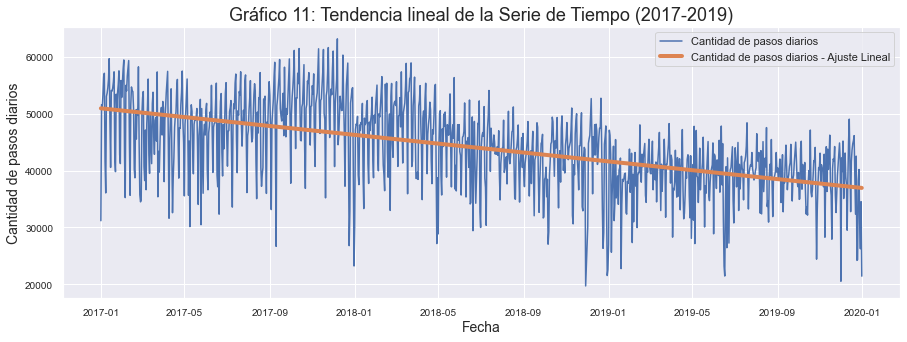

In [46]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos diarios')
plt.plot(diario.index, reg.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos diarios - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 11: Tendencia lineal de la Serie de Tiempo (2017-2019)', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.legend()
plt.show()

In [47]:
# La tendencia lineal es negativa debido a la migración a otras formas de pago (Telepeaje, medios de pago digitales, etc).

##### Autocorrelaciones

In [48]:
from statsmodels.tsa.stattools import acf

nlags = 50
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

C:\Users\User\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


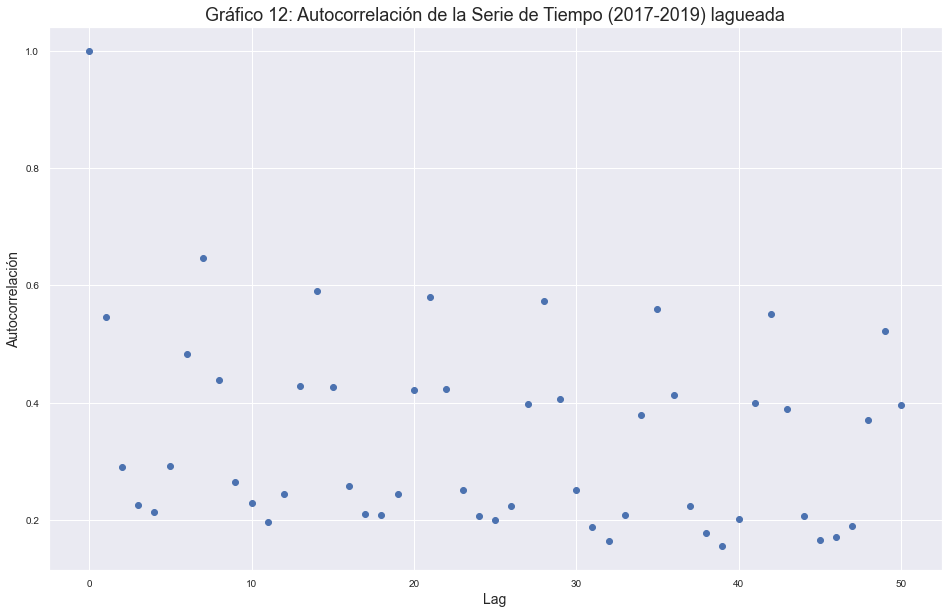

In [49]:
plt.figure(figsize = (16, 10))
plt.scatter(np.arange(nlags + 1), autocorr)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 12: Autocorrelación de la Serie de Tiempo (2017-2019) lagueada', fontsize = 18);
plt.xlabel('Lag', fontsize = 14);
plt.ylabel('Autocorrelación', fontsize = 14);
plt.show()

In [50]:
# Puede contemplarse que el primer valor de autocorrelación (lag 0) da 1 porque se está evaluando la serie contra ella misma.
# Respecto del resto de los puntos, puede observarse una constancia en la autocorrelación de la serie. La misma pareciera mostrar
# patrones comunes en los mismos días de cada semana.

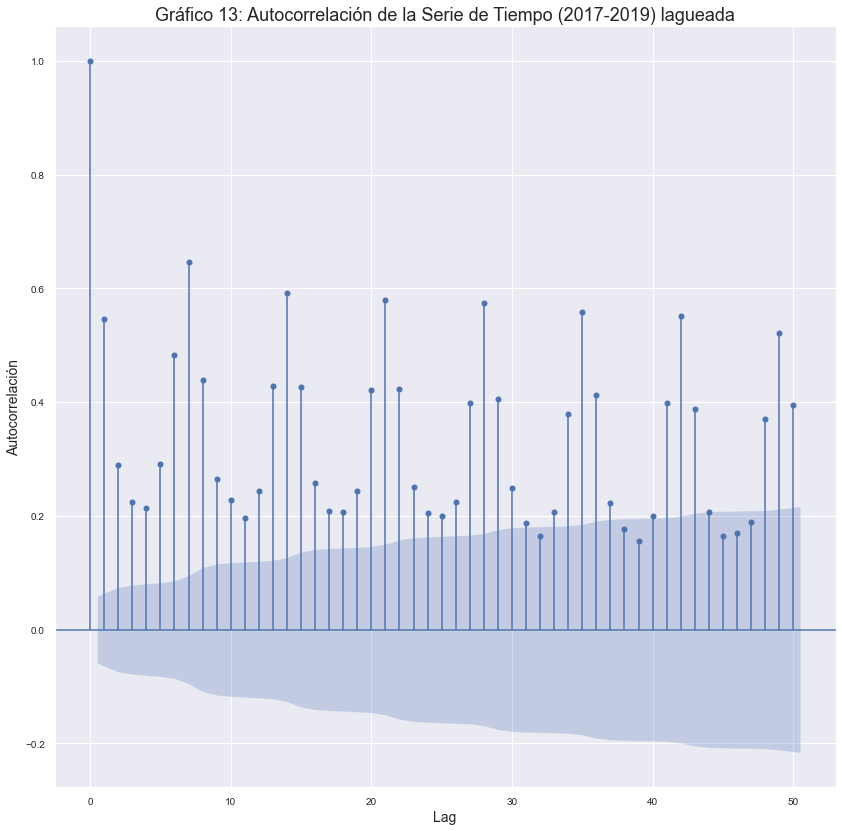

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 50)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 13: Autocorrelación de la Serie de Tiempo (2017-2019) lagueada', fontsize = 18);
plt.xlabel('Lag', fontsize = 14);
plt.ylabel('Autocorrelación', fontsize = 14);
plt.show()

In [52]:
# Como puede verse en el gráfico precedente, existen muchos valores de autocorrelación significativos (por fuera del intervalo
# de confianza), lo que quiere decir que la serie no sería, en principio, estacionaria. Asimismo, parece confirmarse la existencia
# de un ciclo semanal autocorrelacionado.

##### Transformación One Step Prediction

In [53]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [54]:
# Se define la cantidad de datos (días) con los que se predecirá:

look_back = 60

In [55]:
# Se genera la tabla VACÍA con la que se entrenará el modelo:

N = senial.shape[0]
X = np.zeros((N - look_back - 1, look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1034, 60) (1034,)


In [56]:
# Se llena la tabla con los datos de las observaciones:

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [57]:
# Se define que se entrenará al modelo en base a datos de dos años del dataset y se lo evaluará con el año restante:

N_train = 2 * 365 - look_back
N_test = 1 * 365
N_total = N_train + N_test

length_total = N_train + N_test + look_back
                                            
X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test,:]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(670, 60) (670,)
(364, 60) (364,)


#### Predicción a Futuro

##### Modelo Benchmark: predicción en base al valor de la fecha anterior

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
y_train_pred_benchmark = y[0 : N_train - 1]

MSE_benchmark_train = mean_squared_error(y_train[1 : N_train], y_train_pred_benchmark)
R2_benchmark_train = r2_score(y_train[1 : N_train], y_train_pred_benchmark)

print('Error (RMSE) en Train:', np.sqrt(MSE_benchmark_train))
print('Error (R2 Score) en Train:', R2_benchmark_train)

Error (RMSE) en Train: 7326.04847167063
Error (R2 Score) en Train: -0.04008050294828114


In [60]:
y_test_pred_benchmark = y[-1 + N_train : N_train - 1 + N_test - 1]

MSE_benchmark_test = mean_squared_error(y_test, y_test_pred_benchmark)
R2_benchmark_test = r2_score(y_test, y_test_pred_benchmark)

print('Error (RMSE) en Test:', np.sqrt(MSE_benchmark_test))
print('Error (R2 Score) en Test:', R2_benchmark_test)

Error (RMSE) en Test: 6481.942281052039
Error (R2 Score) en Test: -0.7145953813125714


In [61]:
# Como puede observarse, el "modelo" pareciera ser bastante errático, tanto en Train como en Test.

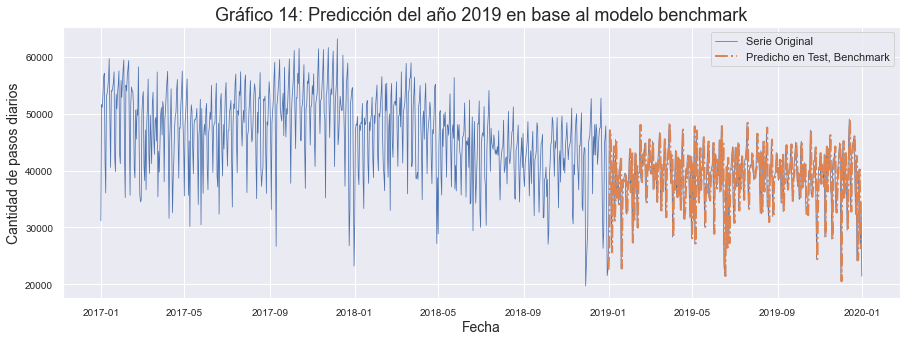

In [62]:
plt.figure(figsize = (15,5))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train + look_back: length_total - 1], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 14: Predicción del año 2019 en base al modelo benchmark', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.legend()
plt.show()

In [63]:
# No obstante el gran error que tiene este "modelo" para predecir, parece tener bastante capacidad para adaptarse a la tendencia
# de los datos; por lo tanto, los valores predichos están bastante cercanos a los verdaderos.

##### Modelo Avanzado de Predicción: RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = 4).fit(X_train, y_train)

In [65]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

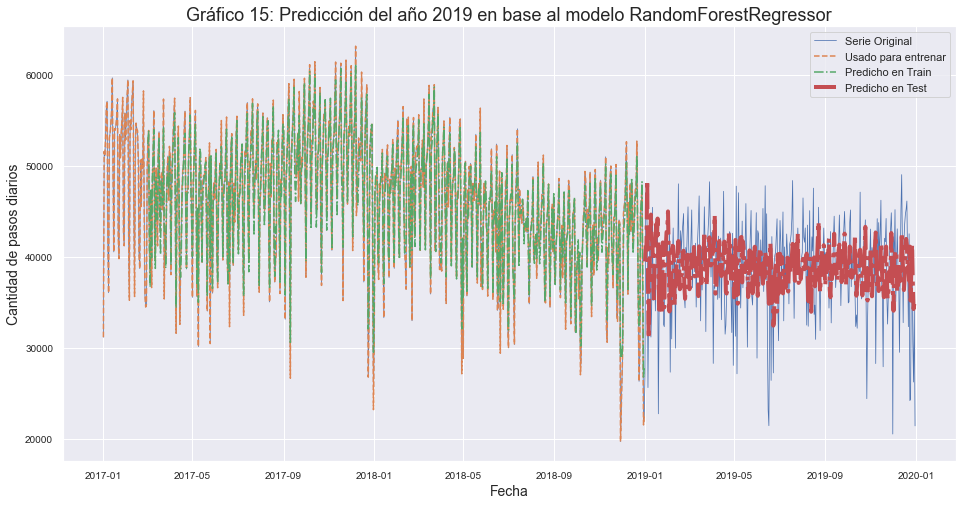

In [66]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 15: Predicción del año 2019 en base al modelo RandomForestRegressor', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

##### Información que utiliza el modelo para predecir

No handles with labels found to put in legend.


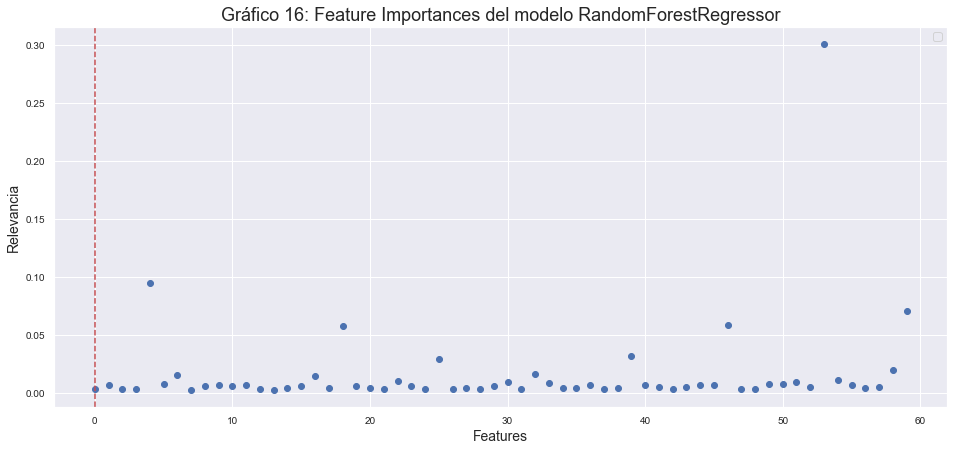

In [67]:
plt.figure(figsize = (16,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(1) * 365:
    plt.axvline(x, linestyle ='--', color= 'r')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 16: Feature Importances del modelo RandomForestRegressor', fontsize = 18);
plt.xlabel('Features', fontsize = 14);
plt.ylabel('Relevancia', fontsize = 14);
plt.legend()
plt.show()

In [68]:
# Como puede apreciarse en el gráfico precedente, el modelo utiliza principalmente las features (fechas diarias) más cercanas a
# la predicción para establecer la cantidad de pasos o tráfico que habrá en el futuro. Asimismo, como se dijo anteriormente,
# existen ciclos anteriores que se repiten y que el modelo utiliza para realizar predicciones. En este caso puede observase que
# la importancia de los features se incrementa considerablemente cada 7 días, lo que sería coincidente con un ciclo semanal que
# se repite.

In [69]:
# Se genera una función para evaluar regresiones:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'R2 en Train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'Test')
    plt.title('Gráfico: Densidad de Errores', fontsize = 11, loc = 'center', wrap = True);
    plt.xlabel('Errores', fontsize = 9)
    plt.ylabel('Densidad', fontsize = 9)
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s = 2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
   
    ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
    plt.title('Gráfico: Val. Reales vs Val. Predichos (Test)', fontsize = 11, loc = 'center', wrap = True)
    plt.xlabel('y (Test)', fontsize = 9)
    plt.ylabel('y_pred (Test)', fontsize = 9)

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 1801.9050630672496
Raíz del error cuadrático medio en Test: 4941.120811209586
R2 en Train: 0.9370657921616256
R2 en Test: 0.0036721373486104936


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


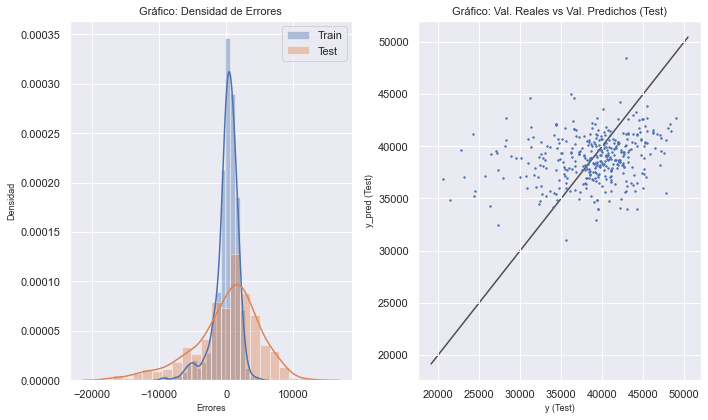

In [70]:
evaluar_regresion(rf, X_train, X_test, y_train, y_test)

In [71]:
# El modelo pareciera ser bastante preciso en Train pero muy incapaz para predecir en Test. Esto podría deberse a la tendencia
# decreciente de la serie (lo que disminuiría la capacidad predictora del modelo) y al algoritmo utilizado (RandomForestRegressor),
# el cual suele tener una tendecia hacia el sobreajuste.

# El histograma de los errores es relativamente simétrico, aproximadamente gaussiano, pero no parecido para ambos conjuntos, ya
# que el conjunto Test tiene mucha mayor dispersión y menor densidad que el conjunto Train. Esto es un indicador de que la
# aproximación a los datos se da de una manera que no es del todo correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una gran proporción por fuera. No es completamente lo que se espera para un buen regresor.

##### Optimización de los hiperparámetros del modelo: GridSearch y Validación Cruzada

In [72]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(max_train_size = None, n_splits = 4)

param_search= {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

grid_search= GridSearchCV(estimator = rf, cv = tscv, scoring = 'neg_mean_squared_error', param_grid = param_search)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=RandomForestRegressor(n_jobs=4, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             scoring='neg_mean_squared_error')

In [73]:
# El mejor hiperparámetro es max_depth = 9

print("Mejores Parámetros:" + str(grid_search.best_params_))
print("Mejor Score:" + str(grid_search.best_score_)+'\n')

Scores = pd.DataFrame(grid_search.cv_results_)
Scores

Mejores Parámetros:{'max_depth': 9}
Mejor Score:-29843946.862027258



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,6.559578,10.889009,0.050315,0.001582,1,{'max_depth': 1},-3.487730e+07,-3.575066e+07,-2.685541e+07,-4.680565e+07,-3.607226e+07,7.100833e+06,15
1,0.307496,0.053510,0.048720,0.008977,2,{'max_depth': 2},-3.238900e+07,-3.345808e+07,-2.247366e+07,-3.596486e+07,-3.107140e+07,5.130775e+06,12
2,0.358892,0.054371,0.029231,0.002771,3,{'max_depth': 3},-3.656009e+07,-3.194891e+07,-2.163306e+07,-3.435422e+07,-3.112407e+07,5.717161e+06,13
3,0.406249,0.096741,0.030231,0.002771,4,{'max_depth': 4},-3.708320e+07,-3.142445e+07,-2.195876e+07,-3.421445e+07,-3.117022e+07,5.682129e+06,14
4,0.442976,0.123286,0.030730,0.003343,5,{'max_depth': 5},-3.735754e+07,-3.119788e+07,-2.172452e+07,-3.348014e+07,-3.094002e+07,5.758227e+06,11
5,0.485621,0.154432,0.029231,0.001090,6,{'max_depth': 6},-3.612228e+07,-3.043694e+07,-2.152973e+07,-3.260341e+07,-3.017309e+07,5.386940e+06,9
6,0.525094,0.172744,0.028483,0.001118,7,{'max_depth': 7},-3.708860e+07,-2.981401e+07,-2.151472e+07,-3.268495e+07,-3.027557e+07,5.683046e+06,10
7,0.558904,0.194458,0.029231,0.000830,8,{'max_depth': 8},-3.639726e+07,-3.003261e+07,-2.121686e+07,-3.261122e+07,-3.006449e+07,5.587295e+06,7
8,0.638854,0.235485,0.031480,0.003902,9,{'max_depth': 9},-3.671203e+07,-2.940885e+07,-2.086796e+07,-3.238695e+07,-2.984395e+07,5.796443e+06,1
9,0.636356,0.222143,0.031729,0.003764,10,{'max_depth': 10},-3.634959e+07,-2.979872e+07,-2.115420e+07,-3.234529e+07,-2.991195e+07,5.569455e+06,3


In [74]:
# Se incorporan los hiperparámetros con mejor score para optimizar el modelo:

rf_optimizado = RandomForestRegressor(max_depth = 9, n_estimators = 100, random_state = 42, n_jobs = 4).fit(X_train, y_train)

y_train_pred_optimizado = rf_optimizado.predict(X_train)
y_test_pred_optimizado = rf_optimizado.predict(X_test)

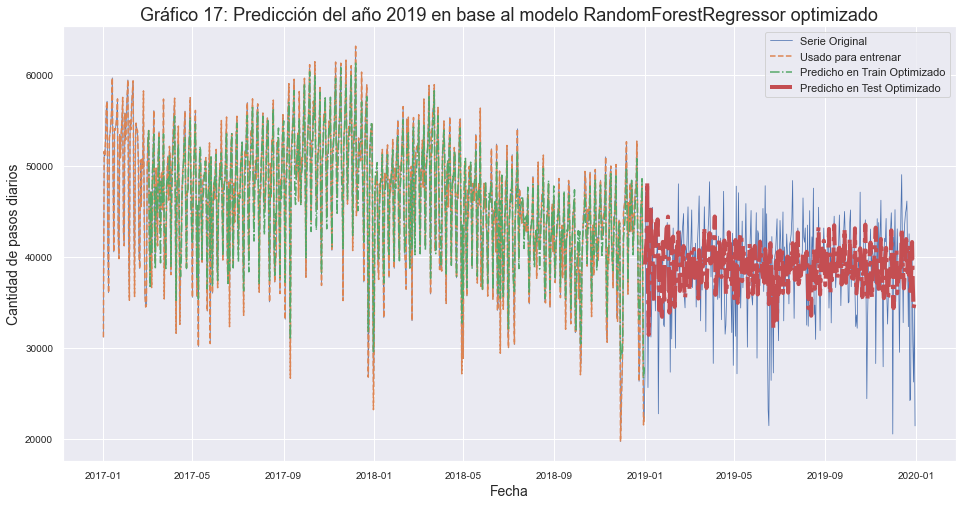

In [75]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred_optimizado,'-.',label = 'Predicho en Train Optimizado')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred_optimizado,'-.', lw = 4, label = 'Predicho en Test Optimizado')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 17: Predicción del año 2019 en base al modelo RandomForestRegressor optimizado', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

Raíz del error cuadrático medio en Train: 2124.0902530807434
Raíz del error cuadrático medio en Test: 5001.7285240589445
R2 en Train: 0.9125481721841079
R2 en Test: -0.020919649417871833


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


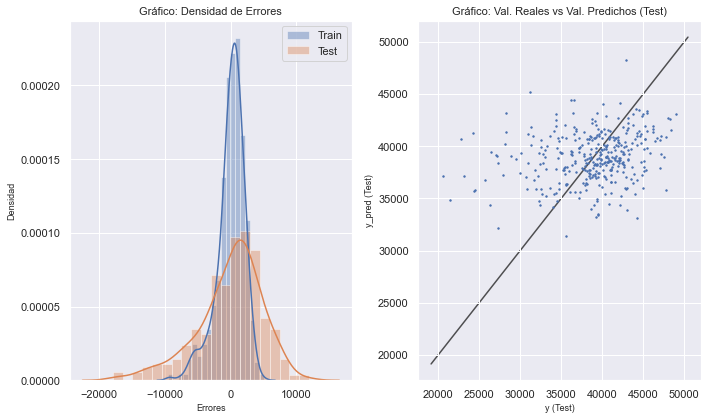

In [76]:
evaluar_regresion(rf_optimizado, X_train, X_test, y_train, y_test)

In [77]:
# La optimización del modelo lo empeora levemnte. Consecuentemente, podría intentarse incorporar otros hiperparámetros a la
# optimización; sin embargo, esto resulta muy costoso a nivel computacional.A pesar de esto, las métricas de error parecen ser
# menores que las del modelo benchmark.

# El histograma de los errores es relativamente simétrico, aproximadamente gaussiano, pero no parecido para ambos conjuntos, ya
# que el conjunto Test tiene mucha mayor dispersión y menor densidad que el conjunto Train. Esto es un indicador de que la
# aproximación a los datos se da de una manera que no es del todo correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una gran proporción por fuera. No es completamente lo que se espera para un buen regresor.

##### Predicción del tráfico en la Autopista Illia para el último trimestre del 2019:

In [78]:
N_train = 1003 - look_back # Días desde 2017 hasta el 1° de Octubre de 2019.
N_test = 92 # Días desde el 1° de Octubre hasta el 31 de Diciembre de 2019.
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test,:]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(943, 60) (943,)
(91, 60) (91,)


In [79]:
y_train_pred_optimizado = rf_optimizado.predict(X_train)
y_test_pred_optimizado = rf_optimizado.predict(X_test)

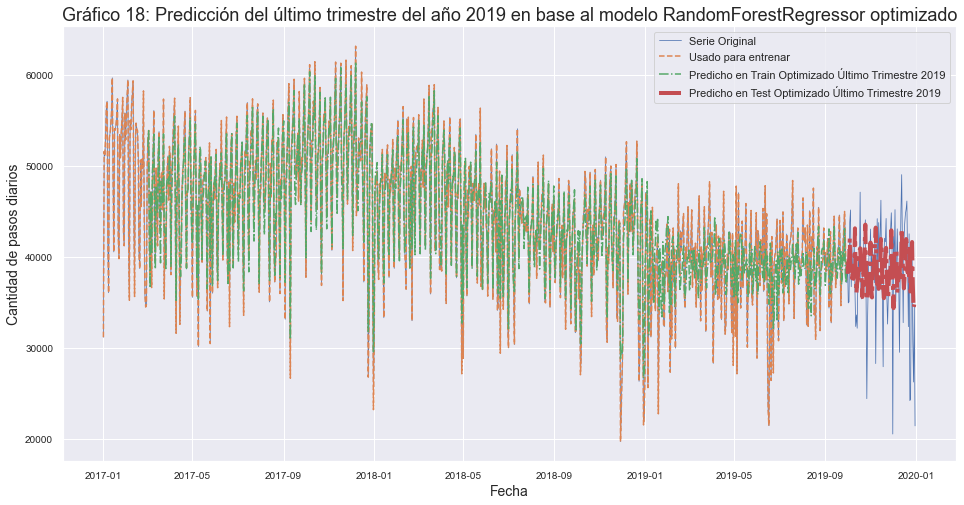

In [80]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred_optimizado,'-.',label = 'Predicho en Train Optimizado Último Trimestre 2019')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred_optimizado,'-.', lw = 4, label = 'Predicho en Test Optimizado Último Trimestre 2019')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 18: Predicción del último trimestre del año 2019 en base al modelo RandomForestRegressor optimizado', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

Raíz del error cuadrático medio en Train: 3206.8550162680426
Raíz del error cuadrático medio en Test: 5169.049914157986
R2 en Train: 0.8083688085074652
R2 en Test: 0.12413782014241403


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


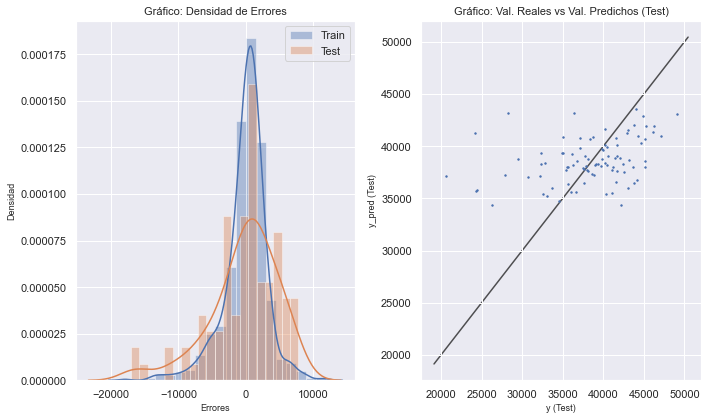

In [81]:
evaluar_regresion(rf_optimizado, X_train, X_test, y_train, y_test)

In [82]:
# Las métricas de error son peores, tanto en Train como en Test. El modelo parece tener inconvenientes para predecir los picos.
# Puede que esto se deba a la tendencia de la serie y a que esta no sea estacionaria.

# El histograma de los errores es relativamente simétrico y aproximadamente gaussiano para el conjunto Train. Sin embargo, en lo
# que respecta al conjunto Test, el mismo parece haber tomado una distribución asimétrica negativa. Además, el conjunto Test tiene
# mucha mayor dispersión y menor densidad que el conjunto Train. Al ser la distribución tan distinta para ambos conjuntos, se
# puede concluir que la aproximación a los datos se da de una manera que no es correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una gran proporción por fuera. No es completamente lo que se espera para un buen regresor.

##### Predicción del tráfico en el año 2020 en base al modelo creado

In [83]:
# Se incorpora el Data Set de 2020 para poder hacer One Step Prediction (ya que sino se debería hacer Multi Step Prediction y
# arrastrar los errores de predicción de nuestro modelo):

dataset_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
dataset_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [84]:
# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo:

mask_2020 = np.logical_and(dataset_2020.estacion == 'ILLIA', dataset_2020.forma_pago == 'Efectivo')
dataset_2020_mask = dataset_2020[mask_2020]

# Se quitan las columnas que no se utilizarán:

dataset_2020_mask.drop(columns = ['periodo', 'hora_inicio', 'forma_pago', 'estacion', 'dia', 'dia_fecha', 'mes', 'observacion'], inplace = True)
dataset_2020_mask.reset_index(inplace = True, drop = True)
dataset_2020_mask.head()

C:\Users\User\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01 00:00:00,1.0,Auto,Centro,326.0
1,2020-01-01 00:00:00,1.0,Auto,Provincia,319.0
2,2020-01-01 00:00:00,2.0,Auto,Centro,199.0
3,2020-01-01 00:00:00,2.0,Auto,Provincia,180.0
4,2020-01-01 00:00:00,3.0,Auto,Centro,114.0


In [85]:
# Se pasa la columna fecha a formato datetime, y se le une la hora_fin como hora:

dataset_2020_mask['fecha2'] = pd.to_datetime(dataset_2020_mask.fecha) + pd.to_timedelta(dataset_2020_mask.hora_fin, unit = 'h')

# Se quitan las columnas fecha y hora_fin ya que las mismas se incluyen en el campo fecha2:

dataset_2020_mask.drop(columns=['fecha', 'hora_fin'], inplace = True)

# Se corrige el nombre de fecha2 a fecha:

dataset_2020_mask.rename(columns = {'fecha2' : 'fecha'}, inplace = True) 

# Se reordena el dataset por fecha:

dataset_2020_mask.sort_values('fecha', inplace = True)
dataset_2020_mask.reset_index(drop=True, inplace = True)
dataset_2020_mask

<ipython-input-85-bae861f1a627>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2020_mask['fecha2'] = pd.to_datetime(dataset_2020_mask.fecha) + pd.to_timedelta(dataset_2020_mask.hora_fin, unit = 'h')
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Moto,Centro,7.0,2020-01-01 00:00:00
1,Auto,Provincia,423.0,2020-01-01 00:00:00
2,Auto,Centro,467.0,2020-01-01 00:00:00
3,Moto,Provincia,6.0,2020-01-01 00:00:00
4,Pesados 2 Ejes,Centro,1.0,2020-01-01 00:00:00
...,...,...,...,...
52369,Auto,Provincia,222.0,2020-12-31 20:00:00
52370,Auto,Provincia,106.0,2020-12-31 21:00:00
52371,Moto,Centro,5.0,2020-12-31 21:00:00
52372,Moto,Provincia,1.0,2020-12-31 21:00:00


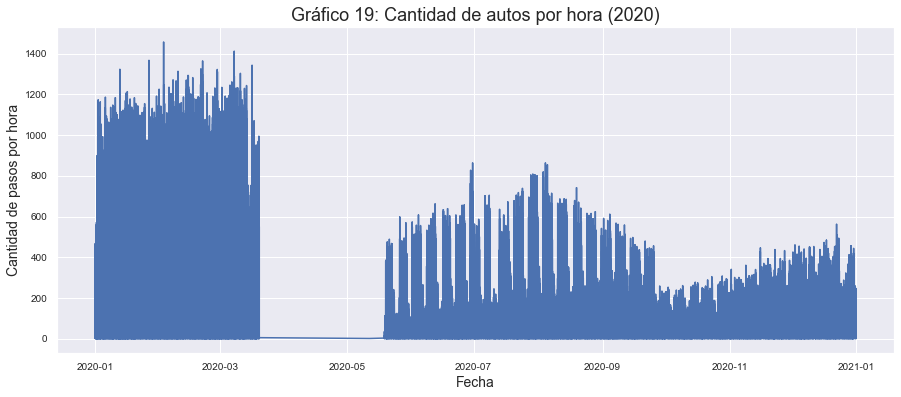

In [86]:
# Se grafican los datos (por hora) de 2020:

plt.figure(figsize = (15,6))
plt.plot(dataset_2020_mask.fecha, dataset_2020_mask.cantidad_pasos)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos por hora', fontsize = 14);
plt.title('Gráfico 19: Cantidad de autos por hora (2020)', fontsize = 18);
plt.show()

In [87]:
# Se resamplean los datos para agrupar por dia:

diario_2020 = dataset_2020_mask.resample('D', on = 'fecha').sum()
print(diario_2020.shape)
diario_2020.head()

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0


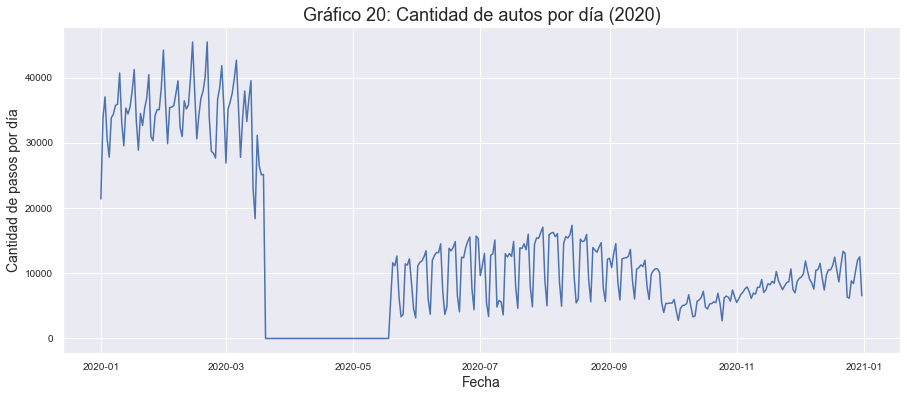

In [88]:
plt.figure(figsize = (15, 6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos por día', fontsize = 14);
plt.title('Gráfico 20: Cantidad de autos por día (2020)', fontsize = 18);
plt.show()

In [89]:
# Como puede contemplarse en el gráfico precedente, la cantidad de pasos por el peaje se derrumbó desde fines de Marzo de 2021,
# llegando incluso a ser 0 por varios meses. Esto se debió, como es de público conocimiento, a la cuarentena implementada (y la
# consecuente disminución del tráfico) y al hecho de que el Gobierno de la Ciudad de Buenos Aires liberó el pago de los peajes
# hasta fines de Mayo para desincentivar la utilización de transporte público. Asimismo, puede observarse una nueva y marcada
# disminución de los pagos en efectivo desde fines de Septiembre, ya que en dicho momento se implementó la utilización obligatoria
# del Telepase.

In [90]:
# Se concatena el dataset de los años 2017, 2018 y 2019 con el generado para el año 2020:

diario_total = pd.concat([diario, diario_2020])
print(diario.shape)
print(diario_total.shape)

(1095, 2)
(1461, 2)


In [91]:
senial_total = diario_total.cantidad_pasos
senial_total.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [92]:
# Se genera la tabla VACÍA con la que se entrenará el modelo:

N = senial_total.shape[0]
X = np.zeros((N - look_back - 1, look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1400, 60) (1400,)


In [93]:
# Se llena la tabla con los datos de las observaciones:

for i in range(X.shape[0]):
#     X[i,:] = senial_total.values.iloc[i : i + look_back]
#     y[i] = senial_total.values.iloc[ i + look_back]
    X[i,:] = senial_total.iloc[i : i + look_back]
    y[i] = senial_total.iloc[i + look_back]

In [94]:
N_train = 3 * 365 - look_back # Se entrena el modelo con los datos de los años 2017, 2018, 2019.
N_test = 1 * 366 # Se testea el modelo con los datos del año 2020 (bisiesto).
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1035, 60) (1035,)
(365, 60) (365,)


In [95]:
# Se utiliza el modelo optimizado para predecir:

y_train_pred_optimizado = rf_optimizado.predict(X_train)
y_test_pred_optimizado = rf_optimizado.predict(X_test)

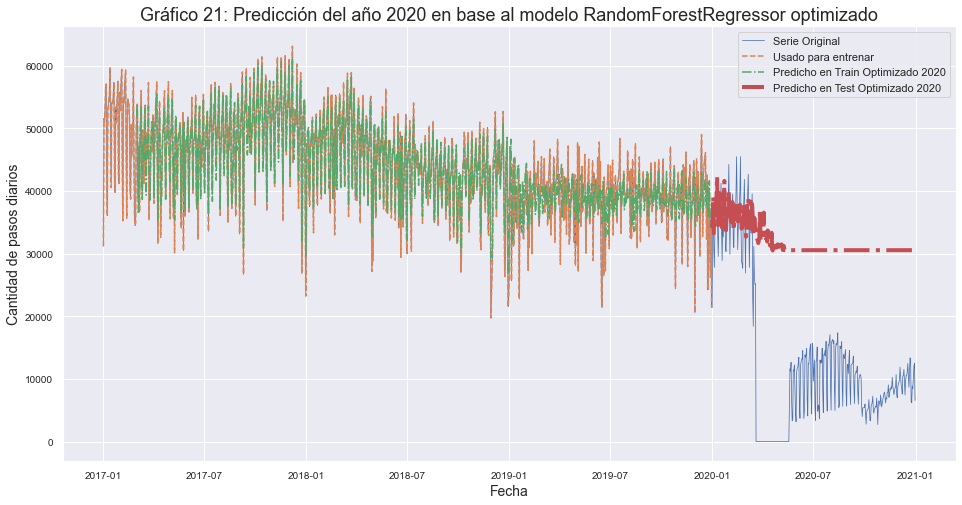

In [96]:
plt.figure(figsize = (16,8))
plt.plot(senial_total.index[:length_total], senial_total[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_total.index[:N_train + look_back], senial_total[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_total.index[look_back : look_back + N_train], y_train_pred_optimizado,'-.',label = 'Predicho en Train Optimizado 2020')
plt.plot(senial_total.index[N_train + look_back : length_total - 1], y_test_pred_optimizado,'-.', lw = 4, label = 'Predicho en Test Optimizado 2020')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend()
plt.title('Gráfico 21: Predicción del año 2020 en base al modelo RandomForestRegressor optimizado', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

In [97]:
# El derrumbe en la cantidad de pasos por el peaje pagados con efectivo es imposible de predecir por parte del modelo.

Raíz del error cuadrático medio en Train: 3449.7681029290998
Raíz del error cuadrático medio en Test: 21294.85607732732
R2 en Train: 0.7824634795747936
R2 en Test: -2.0379950447320394


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


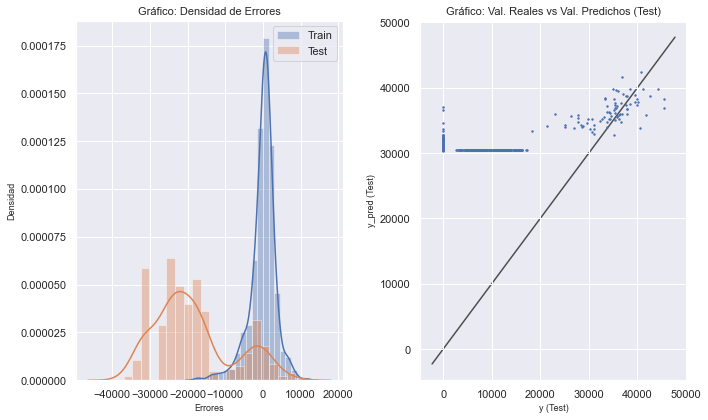

In [98]:
evaluar_regresion(rf_optimizado, X_train, X_test, y_train, y_test)

In [126]:
# Las métricas de error disminuyen considerablemente respecto de las predicciones del año anterior (sobre todo en Train).

# El histograma de los errores es relativamente simétrico y aproximadamente gaussiano para el conjunto Train. Sin embargo, en lo
# que respecta al conjunto Test, el mismo parece haber tomado una distribución bimodal. Además, el conjunto Test tiene mucha
# mayor dispersión y menor densidad que el conjunto Train. Al ser la distribución tan distinta para ambos conjuntos, se puede
# concluir que la aproximación a los datos se da de una manera que no es correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, una parte de los puntos está cerca de la diagonal (relación y = x); sin
# embargo, existe una enorme proporción por fuera y alejado de la misma. No es lo que se espera para un buen regresor.

#### Para pensar, investigar y, opcionalmente, implementar

##### ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.?

In [ ]:
# Podría analizarse la serie del tiempo con una menor cantidad de filtros para poder tener una predicción más similar al tráfico.
# Del mismo modo, sería posible filtrar el día de vehículo para analizar en que horarios hay mayor transito de camiones o, por
# el contrario, de particulares. Mediante la incorporación del Telepase podría lograrse una visualización más realista y mejores
# predicciones acerca del flujo vehiculos que transitan por la autopista.

##### ¿Hay algo que te gustaría investigar o probar?

In [ ]:
# Me gustaría incorporar los datos del Telepase a la serie de tiempo y, de ser necesario, hacer alguna transformación (diferenciarla o
# aplicarle un logaritmo) para que la misma sea estacionaria y analizar si los resultados del modelo mejoran gracias a ello.
# También se podría suavizar un poco más la serie para que no tenga tanto ruido pero, en caso de hacer esto, posiblemente habría
# que incorporar nuevos datos ya que contaríamos con una sustencial merma en los mismos.